# Testing
### *Titel*
Datum: DD.MM.YYYY

**Importiere die notwendigen Packages**

In [2]:
#pip install geopandas fiona requests folium mplleaflet contextily

In [2]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas as gpd
import folium 



Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [3]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/bev_bestand_jahr_statzone_herkunft_konfession_od3161

In [19]:
#Die Datasets sind nur zum Testen auf INT-DWH-Dropzone. Wenn der Test vorbei ist, sind sie auf PROD. 
# Über den Status kann man einfach switchen

status = "prod";
print(status)

prod


In [22]:
# Filepath
if status == "prod":
    fp = r"\\szh\ssz\applikationen\OGD_Dropzone\DWH\bev_bestand_jahr_statzone_herkunft_konfession_OD3161/BEV316OD3161.csv"

else:
    fp = r"\\szh\ssz\applikationen\OGD_Dropzone\INT_DWH\bev_bestand_jahr_statzone_herkunft_konfession_OD3161/BEV316OD3161.csv"
    
print(fp)

\\szh\ssz\applikationen\OGD_Dropzone\DWH\bev_bestand_jahr_statzone_herkunft_konfession_OD3161/BEV316OD3161.csv


In [23]:

# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [24]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [25]:
data2betested.head(3)

,StichtagDatJahr,StatZoneSort,StatZoneLang,QuarSort,QuarLang,KreisSort,herkunftSort,KonOGDSort,KonOGDKurz,AnzBestWir
0,1993,1101,Zähringerstrasse,11,Rathaus,1,1,1,EV-REF,157
1,1993,1101,Zähringerstrasse,11,Rathaus,1,1,2,RK,122
2,1993,1101,Zähringerstrasse,11,Rathaus,1,1,4,andere Konf.,129


In [26]:
data2betested.dtypes

StichtagDatJahr     int64
StatZoneSort        int64
StatZoneLang       object
QuarSort            int64
QuarLang           object
KreisSort           int64
herkunftSort        int64
KonOGDSort          int64
KonOGDKurz         object
AnzBestWir          int64
dtype: object

In [27]:
data2betested.shape

(35499, 10)

Beschreibe einzelne Attribute

In [28]:
data2betested.describe()

,StichtagDatJahr,StatZoneSort,QuarSort,KreisSort,herkunftSort,KonOGDSort,AnzBestWir
count,35499,35499,35499,35499,35499,35499,35499
mean,2007,6919,69,7,1,2,302
std,8,3445,34,3,1,1,267
min,1993,1101,11,1,1,1,0
25%,2000,3407,34,3,1,1,78
50%,2007,7202,72,7,1,2,247
75%,2014,10102,101,10,2,4,446
max,2020,12304,123,12,2,4,2258


Wie viele Nullwerte gibt es im Datensatz?

In [29]:
data2betested.isnull().sum()

StichtagDatJahr    0
StatZoneSort       0
StatZoneLang       0
QuarSort           0
QuarLang           0
KreisSort          0
herkunftSort       0
KonOGDSort         0
KonOGDKurz         0
AnzBestWir         0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [30]:
data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')

#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested

,StichtagDatJahr,StatZoneSort,StatZoneLang,QuarSort,QuarLang,KreisSort,herkunftSort,KonOGDSort,KonOGDKurz,AnzBestWir
0,1993-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,1,EV-REF,157
1,1993-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,2,RK,122
2,1993-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,4,andere Konf.,129
3,1993-01-01,1101,Zähringerstrasse,11,Rathaus,1,2,1,EV-REF,8
4,1993-01-01,1101,Zähringerstrasse,11,Rathaus,1,2,2,RK,73
...,...,...,...,...,...,...,...,...,...,...
35494,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,1,2,RK,422
35495,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,1,4,andere Konf.,601
35496,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,2,1,EV-REF,22
35497,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,2,2,RK,165


Bereite die Daten für die Grafik unten vor

In [31]:
Jahre = data2betested.groupby("StichtagDatJahr")
len(Jahre)

28

In [32]:
for key, group in Jahre:
    print(key, len(group))

1993-01-01 00:00:00 1264
1994-01-01 00:00:00 1263
1995-01-01 00:00:00 1263
1996-01-01 00:00:00 1262
1997-01-01 00:00:00 1263
1998-01-01 00:00:00 1264
1999-01-01 00:00:00 1267
2000-01-01 00:00:00 1270
2001-01-01 00:00:00 1271
2002-01-01 00:00:00 1270
2003-01-01 00:00:00 1269
2004-01-01 00:00:00 1269
2005-01-01 00:00:00 1269
2006-01-01 00:00:00 1269
2007-01-01 00:00:00 1270
2008-01-01 00:00:00 1270
2009-01-01 00:00:00 1272
2010-01-01 00:00:00 1268
2011-01-01 00:00:00 1268
2012-01-01 00:00:00 1267
2013-01-01 00:00:00 1266
2014-01-01 00:00:00 1265
2015-01-01 00:00:00 1267
2016-01-01 00:00:00 1270
2017-01-01 00:00:00 1271
2018-01-01 00:00:00 1271
2019-01-01 00:00:00 1271
2020-01-01 00:00:00 1270


In [33]:
myJahr = "2020-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr

,StichtagDatJahr,StatZoneSort,StatZoneLang,QuarSort,QuarLang,KreisSort,herkunftSort,KonOGDSort,KonOGDKurz,AnzBestWir
34229,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,1,EV-REF,79
34230,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,2,RK,70
34231,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,4,andere Konf.,171
34232,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,2,1,EV-REF,14
34233,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,2,2,RK,57
...,...,...,...,...,...,...,...,...,...,...
35494,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,1,2,RK,422
35495,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,1,4,andere Konf.,601
35496,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,2,1,EV-REF,22
35497,2020-01-01,12304,Probsteistrasse,123,Hirzenbach,12,2,2,RK,165


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [34]:
test = data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
test
# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    

In [37]:
sel_forpivot =data2betested[(data2betested.AnzBestWir>0)&(data2betested.KonOGDKurz != "Andere")]

forpivot = sel_forpivot
forpivot \
    .groupby(['QuarLang','KreisSort','herkunftSort', 'KonOGDKurz', 'AnzBestWir']) \
    .agg(sum_AnzBestWir=('AnzBestWir', 'sum')) \
    .query('AnzBestWir > 0') \
    .sort_values('AnzBestWir', ascending=False) \
    .head(3)

sum_AnzBestWir
QuarLang  KreisSort herkunftSort KonOGDKurz AnzBestWir                
Affoltern 11        1            EV-REF     2258                  2258
                                            2197                  2197
                                            2092                  2092

**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [38]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [44]:
mySelection = aktuellesJahr[(aktuellesJahr.KreisSort<2) & (aktuellesJahr.KonOGDSort!=5)]
mySelection.head()


,StichtagDatJahr,StatZoneSort,StatZoneLang,QuarSort,QuarLang,KreisSort,herkunftSort,KonOGDSort,KonOGDKurz,AnzBestWir
34229,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,1,EV-REF,79
34230,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,2,RK,70
34231,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,1,4,andere Konf.,171
34232,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,2,1,EV-REF,14
34233,2020-01-01,1101,Zähringerstrasse,11,Rathaus,1,2,2,RK,57


In [45]:
#mySelection = aktuellesJahr[["StatZoneSort","AnzBestWir"]]
#mySelection

In [46]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['KonOGDKurz'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='StatZoneLang',
    y='AnzBestWir',
    color='KonOGDKurz'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [47]:
alt.Chart(mySelection).mark_circle(size=60).encode(
    x='StatZoneLang',
    y='KonOGDKurz',
    color='AnzBestWir',
    tooltip=['KonOGDKurz','StichtagDatJahr','AnzBestWir']
).interactive() # this makes the axes interactive: now you can zoom & pan



alt.Chart(...)

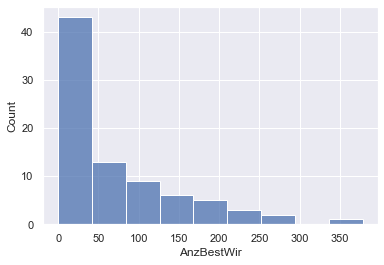

In [48]:
import seaborn as sns
sns.set(style="darkgrid")
sns.histplot(data=mySelection, x="AnzBestWir") #, y="KonOGDKurz")
plt.show();

Test: Choroplethenkarte

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [49]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

quart_geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(quart_geojson_url)

statz_geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Zonen?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statzonen_map"
df_adm_statzonen_map = gpd.read_file(statz_geojson_url)


#df_adm_statistische_quartiere_map.head(5)
df_adm_statzonen_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,stzname,stznr,geometry
0,adm_statzonen_map.1,Kreis 7,7,1,154,Hirslanden,73,Hegibach,7303,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statzonen_map.2,Kreis 7,7,2,89,Hirslanden,73,Klus,7302,"POLYGON ((8.57281 47.35806, 8.57278 47.35807, ..."
2,adm_statzonen_map.3,Kreis 7,7,3,88,Hirslanden,73,Degenried,7301,"POLYGON ((8.59087 47.36850, 8.59066 47.36823, ..."
3,adm_statzonen_map.37,Kreis 2,2,37,153,Enge,24,Gartenstrasse,2406,"POLYGON ((8.53741 47.36846, 8.53731 47.36841, ..."
4,adm_statzonen_map.4,Kreis 8,8,4,105,Weinegg,83,Neumünster,8301,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [25]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

statzonen_shapes = df_adm_statzonen_map[['geometry', 'stznr']].rename(columns={'stznr': 'StatZoneSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
statzonen_shapes_aktJahr = statzonen_shapes.merge(aktuellesJahr, on='StatZoneSort')

statzonen_shapes_aktJahr.head(3)


,geometry,StatZoneSort,StichtagDatJahr,StatZoneLang,QuarSort,QuarLang,KreisSort,herkunftSort,KonOGDSort,KonOGDKurz,AnzBestWir
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,2020-01-01,Hegibach,73,Hirslanden,7,1,1,EV-REF,815
1,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,2020-01-01,Hegibach,73,Hirslanden,7,1,2,RK,578
2,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,2020-01-01,Hegibach,73,Hirslanden,7,1,4,andere Konf.,1170


<AxesSubplot:>

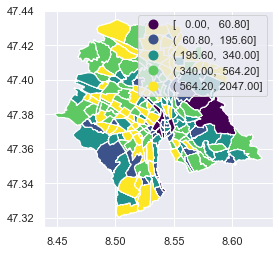

In [26]:
# Plot by StatZonen

statzonen_shapes_aktJahr.plot(column='AnzBestWir', cmap='viridis', scheme='quantiles', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html



<AxesSubplot:>

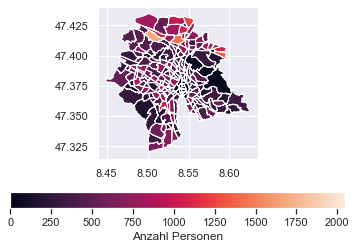

In [27]:
fig, ax = plt.subplots(1, 1)

statzonen_shapes_aktJahr.plot(column='AnzBestWir', ax=ax, legend=True, legend_kwds={'label': "Anzahl Personen",'orientation': "horizontal"})


In [28]:

    
#Bsp. Filter
    # df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#Bsp. Berechne Attribut
    #world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

statzonen_shapes_aktJahr[['geometry','StatZoneSort', 'KonOGDKurz', 'AnzBestWir']].agg(sum)
statzonen_shapes_aktJahr[['geometry','StatZoneSort', 'KonOGDKurz', 'AnzBestWir']]

    

,geometry,StatZoneSort,KonOGDKurz,AnzBestWir
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,EV-REF,815
1,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,RK,578
2,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,andere Konf.,1170
3,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,EV-REF,66
4,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",7303,RK,201
...,...,...,...,...
1265,"POLYGON ((8.52688 47.38273, 8.52685 47.38273, ...",5101,RK,428
1266,"POLYGON ((8.52688 47.38273, 8.52685 47.38273, ...",5101,andere Konf.,1232
1267,"POLYGON ((8.52688 47.38273, 8.52685 47.38273, ...",5101,EV-REF,29
1268,"POLYGON ((8.52688 47.38273, 8.52685 47.38273, ...",5101,RK,191


#Link https://automating-gis-processes.github.io/site/notebooks/L5/interactive-map-folium.html

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)

# Plot a choropleth map
# Notice: 'geoid' column that we created earlier needs to be assigned always as the first column
folium.Choropleth(
    geo_data=data,
    name='Population in 2018',
    data=data,
    columns=['geoid', 'pop18'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    line_color='white',
    line_weight=0,
    highlight=False,
    smooth_factor=1.0,
    #threshold_scale=[100, 250, 500, 1000, 2000],
    legend_name= 'Population in Helsinki').add_to(m)

#Show map
m

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html